In [47]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from matplotlib import pyplot as plt

In [32]:
url="https://ligamx.net/cancha/partidos"

In [33]:
driver=webdriver.Chrome()
driver.get(url)

In [35]:
data = [] 

for i in range(1, 18):
    # Selector
    selector = 'li.marcadoresJnada.jnda_{0}[data-nojnda="{0}"][data-jnda="Jornada {0}"]'.format(i)
    
    # Encontrar el elemento
    element = driver.find_element(By.CSS_SELECTOR, selector)
    
    # Dar click
    element.click()
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    # Encontrar los elementos <p> con la clase 'televisoraW'
    transmisiones = soup.find_all('p', class_='televisoraW')
    
    # Obtener el texto de los elementos
    trans = [transmision.get_text() for transmision in transmisiones]
    
    # Pegar los datos
    data.extend(trans)

In [36]:
data

['TUDN',
 'FOX Sports',
 'Tv Azteca',
 'ESPN',
 'TUDN',
 'TUDN',
 'TUDN',
 'TUDN',
 'FOX Sports ',
 ' Claro Sports',
 '\xa0',
 'Tv Azteca',
 'FOX Sports',
 'TUDN',
 'TUDN',
 'TUDN',
 'TUDN',
 'TUDN',
 'FOX Sports',
 'FOX Sports ',
 ' Claro Sports',
 '\xa0',
 'TUDN',
 'TUDN',
 'Tv Azteca',
 'FOX Sports',
 'ESPN',
 'TUDN',
 'TUDN',
 'TUDN',
 'FOX Sports ',
 ' Claro Sports',
 '\xa0',
 'Tv Azteca',
 'FOX Sports',
 'TUDN',
 'FOX Sports ',
 ' Claro Sports',
 '\xa0',
 'TUDN',
 'TUDN ',
 ' TV Azteca',
 '\xa0',
 'TUDN',
 'TUDN',
 'FOX Sports',
 'TUDN',
 'FOX Sports',
 'ESPN',
 'FOX Sports',
 'FOX Sports ',
 ' Claro Sports',
 '\xa0',
 'TUDN',
 'TUDN',
 'Tv Azteca',
 'TUDN',
 'Tv Azteca',
 'FOX Sports',
 'TUDN',
 'TUDN',
 'TUDN ',
 ' TV Azteca',
 '\xa0',
 'TUDN',
 'TUDN',
 'TUDN',
 'FOX Sports ',
 ' Claro Sports',
 '\xa0',
 'ESPN',
 'FOX Sports',
 'Tv Azteca',
 'TUDN',
 'FOX Sports ',
 ' Claro Sports',
 '\xa0',
 'TUDN',
 'TUDN ',
 ' TV Azteca',
 '\xa0',
 'TUDN',
 'TUDN',
 'Tv Azteca',
 'FOX Sport

In [49]:
#Contar cuantas veces aparece cada cadena
cadena = pd.Series(data)
#Pasar a minusculas
cadena=cadena.str.lower()
cadena=cadena.str.strip()
df=pd.DataFrame(cadena.value_counts(),columns=['count'])
df=df.reset_index()
df=df.rename(columns={'index':'cadena'})
#Eliminar filas con cadena vacia
df=df[df['cadena']!='']
df['pct']=df['count']/df['count'].sum()*100
df

,cadena,count,pct
0,tudn,84,46.408840
1,fox sports,42,23.204420
2,tv azteca,24,13.259669
4,claro sports,17,9.392265
5,espn,9,4.972376
6,chivas tv,4,2.209945
7,izzi,1,0.552486


Text(-1, -15, 'Fuente: @claudiodanielpc con datos de la Liga MX')

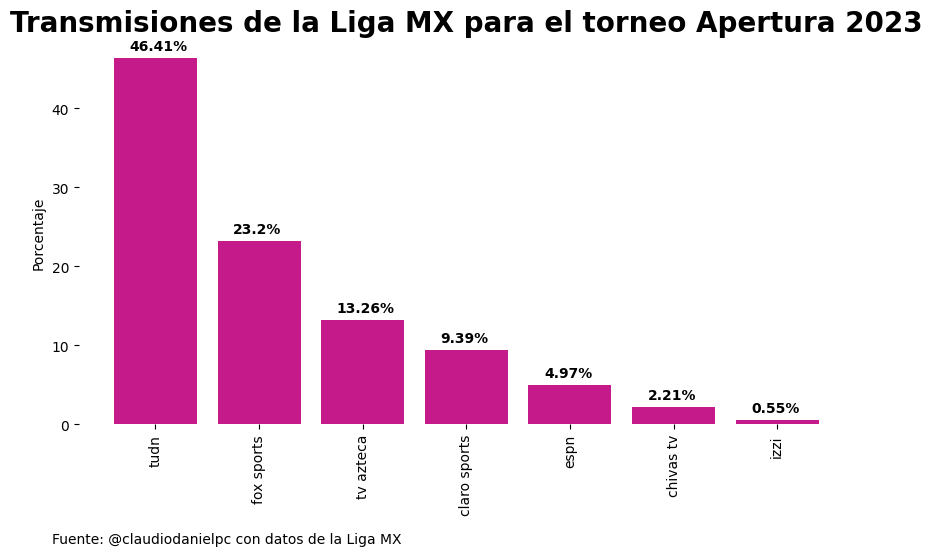

In [65]:
#Gráfica de barras
plt.figure(figsize=(10,5))
plt.bar(df['cadena'],df['pct'],color='#c51b8a')
plt.xticks(rotation=90)
plt.ylabel('Porcentaje')
plt.title('Transmisiones de la Liga MX para el torneo Apertura 2023', fontsize=20, fontweight='bold')
#Eliminar marcos
plt.box(False)
#Agregar numeros a las barras
for i, v in enumerate(df['pct']):
    plt.text(i-.25, v + 1, str(round(v,2))+'%', color='black', fontweight='bold')
#Fuente de datos
plt.text(-1, -15, 'Fuente: @claudiodanielpc con datos de la Liga MX', fontsize=10)